In [1]:
import dill
import tensorflow as tf
import matplotlib.pyplot as plt
import tqdm
import numpy as np

In [2]:
model_file = open("/home/alekspet/Projects/aprec/aprec/evaluation/results/ml_benchmark20m_sasrec_variable_importance_2022_11_04T09_03_25/checkpoints/SASRec-vanilla.dill", "rb")
#model_file = open("/home/alekspet/Projects/aprec/aprec/evaluation/results/ml_benchmark20m_sasrec_variable_importance_2022_11_04T09_03_25/checkpoints/Sasrec-rss-lambdarank-0.01.dill", "rb")
#model_file = open("/home/alekspet/Projects/aprec/aprec/evaluation/results/ml_benchmark20m_sasrec_variable_importance_2022_11_04T09_03_25/checkpoints/Sasrec-rss-lambdarank-0.5.dill", "rb")
#model_file = open("/home/alekspet/Projects/aprec/aprec/evaluation/results/ml_benchmark20m_sasrec_variable_importance_2022_11_04T09_03_25/checkpoints/Sasrec-rss-lambdarank-0.5.dill", "rb")

In [3]:
recommender = dill.load(model_file)

2022-11-04 12:01:25.333515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 12:01:25.353968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 12:01:25.354094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 12:01:25.354826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
user_ids = recommender.recommender.users.straight

In [5]:
sasrec_recommender = recommender.recommender

In [6]:
def get_attention_maps(user_id, sasrec_recommender):
    inputs = sasrec_recommender.get_model_inputs(user_id)[0]
    with tf.device('/cpu:0'):
        seq, attn = sasrec_recommender.model.get_seq_embedding(inputs)
    return attn[0][0].numpy()

In [7]:
m = get_attention_maps('28507', sasrec_recommender)

In [8]:
maps = []
for n in tqdm.tqdm(range(1000)):
    uid = np.random.choice(list(user_ids.keys()))
    maps.append(get_attention_maps(uid, sasrec_recommender))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.50it/s]


In [9]:
maps = np.array(maps)

In [10]:
mean_attentions  = np.mean(maps, axis=0)

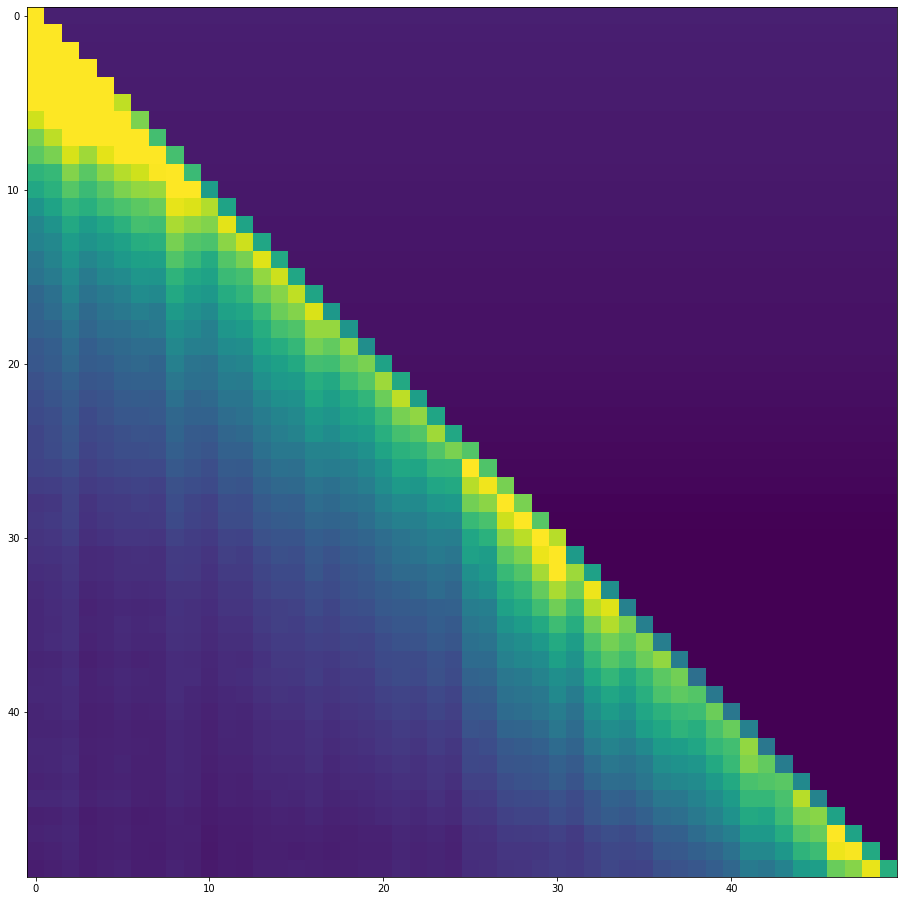

In [11]:
plt.figure(figsize=(16,16))
plt.imshow(mean_attentions, vmax=0.09, vmin=0.0)

In [30]:
res = []
n = 49
a = 0.5
for i in range(n):
    res.append(a ** (n - i))
res = np.array(res) /np.sum(res)

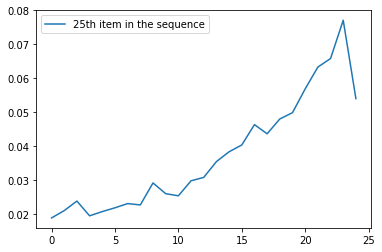

In [31]:
#plt.plot(mean_attentions[49], label='last item in the sequence')
plt.plot(mean_attentions[24][:25], label='25th item in the sequence')
#plt.plot(res, label = 'position_importance')
plt.legend()

In [32]:
rss_weights = np.array([0.00050863, 0.00061887, 0.00092197, 0.0014479 , 0.00090583,
       0.00090679, 0.00081685, 0.00119046, 0.00088777, 0.00057822,
       0.00139008, 0.00110968, 0.00142508, 0.00104092, 0.00105084,
       0.00108611, 0.00110633, 0.00163135, 0.00142438, 0.0030446 ,
       0.00163955, 0.00301373, 0.00228171, 0.00208965, 0.00155316,
       0.00093835, 0.00178353, 0.0017377 , 0.00252213, 0.00173926,
       0.00320056, 0.00308274, 0.00458886, 0.0035606 , 0.0047561 ,
       0.00692631, 0.00971894, 0.0089213 , 0.01161868, 0.01065103,
       0.01554658, 0.0157064 , 0.02285646, 0.03320919, 0.04574714,
       0.06964114, 0.12280825, 0.20446777, 0.34794655, 0.01265421])

In [33]:
vanilla_weights = np.array([0.00723696, 0.00789131, 0.00889317, 0.00740616, 0.00823375,
       0.00879929, 0.00743264, 0.00758507, 0.00899467, 0.00783445,
       0.00634459, 0.00708402, 0.00703078, 0.00810132, 0.00828369,
       0.00845831, 0.00829117, 0.00793688, 0.00801629, 0.00869415,
       0.00855302, 0.01001667, 0.00904213, 0.00945777, 0.00892488,
       0.01191296, 0.01217955, 0.01356116, 0.01392799, 0.01479892,
       0.01614767, 0.01513599, 0.01697625, 0.01921821, 0.01820138,
       0.01843641, 0.02193111, 0.0230982 , 0.02433731, 0.02698987,
       0.02998334, 0.03684098, 0.03525388, 0.04003029, 0.04953673,
       0.050356  , 0.06957363, 0.07372294, 0.08696238, 0.05634372]
    )

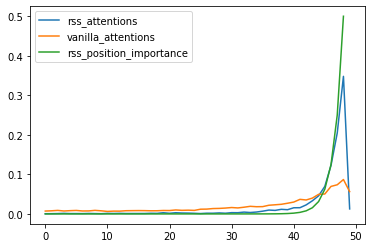

In [37]:
plt.plot(rss_weights, label='rss_attentions')
plt.plot(vanilla_weights, label='vanilla_attentions')
plt.plot(res, label  = 'rss_position_importance')
plt.legend()